In [39]:
#Bahri Selçuk Eşkil

import pandas as pd
import numpy as np

df = pd.read_csv("BankChurners.csv", index_col=0) #import and print data
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000


In [40]:
#defining a relationship between categories; converting all ordinal categories into integers starting from zero. 

income_mapper = { "Unknown": 0, "Less than $40K": 1, "$40K - $60K": 2, "$60K - $80K": 3, "$80K - $120K": 4, "$120K +": 5}
df["Income_Category"] = df["Income_Category"].replace(income_mapper)

attrition_mapper = { "Attrited Customer": 0, "Existing Customer": 1}
df["Attrition_Flag"] = df["Attrition_Flag"].replace(attrition_mapper)

education_mapper = {"Unknown": 0, "Uneducated": 1, "High School": 2, "College": 3, "Graduate": 4, "Post-Graduate": 5, "Doctorate": 6}
df["Education_Level"] = df["Education_Level"].replace(education_mapper)

card_mapper = { "Blue": 0, "Silver": 1 , "Gold": 2, "Platinum": 3}
df["Card_Category"] = df["Card_Category"].replace(card_mapper)

df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,1,45,M,3,2,Married,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,1,49,F,5,4,Single,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,1,51,M,3,4,Married,4,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,1,40,F,4,2,Unknown,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,1,40,M,3,1,Married,3,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772366833,1,50,M,2,4,Single,2,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
710638233,0,41,M,2,0,Divorced,2,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
716506083,0,44,F,1,2,Married,1,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000


In [41]:
#Using dummies for the rest of the categorical data
df = pd.get_dummies(df, columns = ["Gender","Marital_Status"])
df

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
CLIENTNUM,,,,,,,,,,,,,,,,,,,,,
768805383,1,45,3,2,3,0,39,5,1,3,...,1144,42,1.625,0.061,0,1,0,1,0,0
818770008,1,49,5,4,1,0,44,6,1,2,...,1291,33,3.714,0.105,1,0,0,0,1,0
713982108,1,51,3,4,4,0,36,4,1,0,...,1887,20,2.333,0.000,0,1,0,1,0,0
769911858,1,40,4,2,1,0,34,3,4,1,...,1171,20,2.333,0.760,1,0,0,0,0,1
709106358,1,40,3,1,3,0,21,5,1,0,...,816,28,2.500,0.000,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772366833,1,50,2,4,2,0,40,3,2,3,...,15476,117,0.857,0.462,0,1,0,0,1,0
710638233,0,41,2,0,2,0,25,4,2,3,...,8764,69,0.683,0.511,0,1,1,0,0,0
716506083,0,44,1,2,1,0,36,5,3,4,...,10291,60,0.818,0.000,1,0,0,1,0,0


In [42]:
#Deleting one of the columns for each category
df.drop(["Gender_F", "Marital_Status_Divorced"],axis = 1, inplace = True)
df

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
CLIENTNUM,,,,,,,,,,,,,,,,,,,,,
768805383,1,45,3,2,3,0,39,5,1,3,...,11914.0,1.335,1144,42,1.625,0.061,1,1,0,0
818770008,1,49,5,4,1,0,44,6,1,2,...,7392.0,1.541,1291,33,3.714,0.105,0,0,1,0
713982108,1,51,3,4,4,0,36,4,1,0,...,3418.0,2.594,1887,20,2.333,0.000,1,1,0,0
769911858,1,40,4,2,1,0,34,3,4,1,...,796.0,1.405,1171,20,2.333,0.760,0,0,0,1
709106358,1,40,3,1,3,0,21,5,1,0,...,4716.0,2.175,816,28,2.500,0.000,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772366833,1,50,2,4,2,0,40,3,2,3,...,2152.0,0.703,15476,117,0.857,0.462,1,0,1,0
710638233,0,41,2,0,2,0,25,4,2,3,...,2091.0,0.804,8764,69,0.683,0.511,1,0,0,0
716506083,0,44,1,2,1,0,36,5,3,4,...,5409.0,0.819,10291,60,0.818,0.000,0,1,0,0


In [44]:
#scaling data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(df)
df_scaled =pd.DataFrame(data_scaled, columns = df.columns)

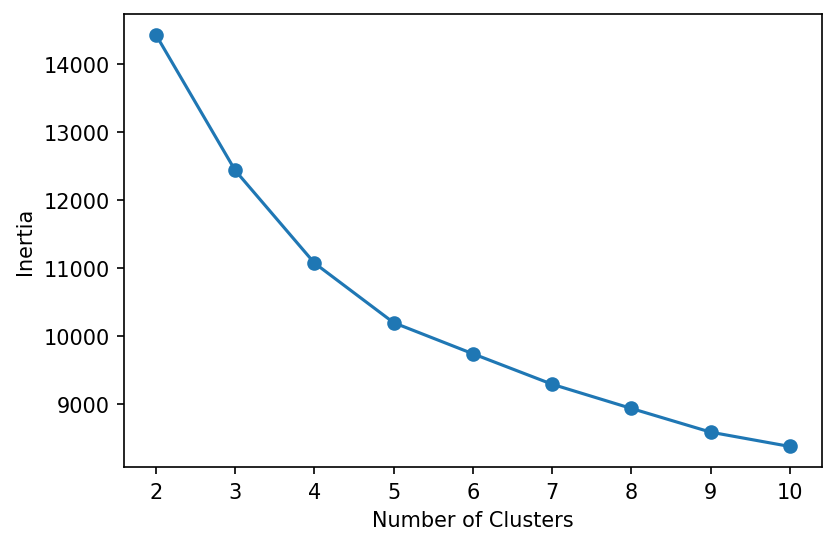

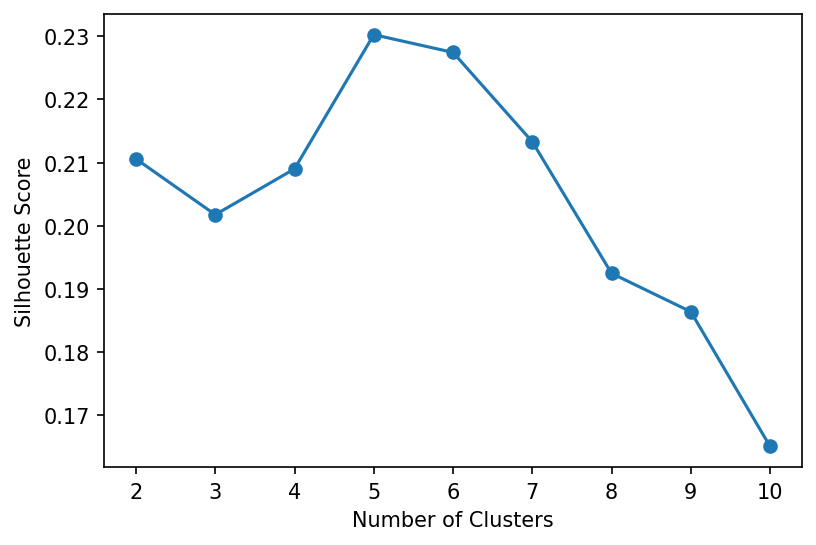

In [48]:
#Trying k values from 2 to 10 and checking both inertia and silhouette scores

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

k_array = np.arange(2,11)
inertia_list = []
silhouette_list = []

for k in k_array:
    km = KMeans(n_clusters = k, n_init = 5, init="k-means++")
    km.fit(df_scaled)
    inertia_list.append(km.inertia_)
    sil_score = silhouette_score(df_scaled, km.labels_)
    silhouette_list.append(sil_score)



import matplotlib.pyplot as plt

plt.figure(dpi = 150)
plt.plot(k_array, inertia_list, marker ="o")

plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

plt.figure(dpi = 150)
plt.plot(k_array, silhouette_list, marker ="o")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

The elbow in the elbow graph shows that best k value is 5. And silhouette score graph shows that the best k value is 5, too; because the highest silhouette score is coming with the k value 5.

In [50]:
#Rerun clustering algorithm with k = 5
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 5, n_init = 5, init="k-means++")

km.fit(df_scaled)

KMeans(n_clusters=5, n_init=5)

In [51]:
#printing out the cluster centers

df_centers = pd.DataFrame(km.cluster_centers_, columns = df_scaled.columns)
df_centers

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,0.827770,0.416357,0.507610,0.429462,0.426969,0.036493,0.516037,0.552203,0.387183,0.402982,...,0.240041,0.220631,0.234228,0.442999,0.192611,0.256155,4.926569e-01,3.885781e-16,-1.110223e-16,1.000000e+00
1,0.867174,0.435200,0.478265,0.432245,0.672361,0.031157,0.534166,0.569052,0.388342,0.422257,...,0.306550,0.230050,0.207769,0.384473,0.192508,0.219335,1.000000e+00,1.000000e+00,-1.110223e-16,-5.551115e-17
2,0.822319,0.426054,0.462050,0.426923,0.198021,0.024271,0.527365,0.555916,0.395199,0.408126,...,0.121517,0.219611,0.220847,0.453162,0.191208,0.332090,-1.776357e-15,-3.441691e-15,8.409181e-01,-1.387779e-16
3,0.842884,0.426682,0.455638,0.433688,0.653235,0.041898,0.531617,0.561460,0.388170,0.411969,...,0.355840,0.221673,0.233464,0.439149,0.190087,0.183288,1.000000e+00,-2.997602e-15,8.401109e-01,-2.775558e-17
4,0.831905,0.446618,0.468707,0.443152,0.198776,0.013600,0.545055,0.567442,0.389433,0.397933,...,0.101350,0.224889,0.200213,0.416024,0.192892,0.354351,-1.776357e-15,1.000000e+00,-8.881784e-16,-1.387779e-16


In [53]:
#Inversing the cluster center data to interpret

inverse_transformed = scaler.inverse_transform(df_centers) 
pd.DataFrame(inverse_transformed, columns=df_centers.columns)

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,0.827770,45.568758,2.538051,2.576769,2.134846,0.109479,35.189586,3.761015,2.323097,2.417891,...,8287.534179,0.749482,4720.005340,67.146862,0.715356,0.255899,4.926569e-01,3.885781e-16,-1.110223e-16,1.000000e+00
1,0.867174,46.454383,2.391324,2.593470,3.361807,0.093470,35.969141,3.845259,2.330054,2.533542,...,10582.961225,0.781479,4244.438283,59.597048,0.714976,0.219116,1.000000e+00,1.000000e+00,-1.110223e-16,-5.551115e-17
2,0.822319,46.024535,2.310249,2.561535,0.990107,0.072814,35.676692,3.779581,2.371191,2.448753,...,4196.906767,0.746018,4479.502572,68.457855,0.710147,0.331758,-1.776357e-15,-3.441691e-15,8.409181e-01,-1.387779e-16
3,0.842884,46.054067,2.278189,2.602126,3.266174,0.125693,35.859519,3.807301,2.329020,2.471811,...,12284.113817,0.753024,4706.277726,66.650185,0.705985,0.183105,1.000000e+00,-2.997602e-15,8.401109e-01,-2.775558e-17
4,0.831905,46.991024,2.343533,2.658915,0.993880,0.040800,36.437373,3.837209,2.336597,2.387597,...,3500.900449,0.763949,4108.627499,63.667075,0.716400,0.353996,-1.776357e-15,1.000000e+00,-8.881784e-16,-1.387779e-16


a) The cluster consisting of the customers with highest attrition flag is the cluster with index 1. This is the cluster with the highest income average and this average is in the 60-80K range. In this cluster, the remaining limit (Avg_Open_To_Buy) is much more than the cluster with index 2. Among all clusters, the total number of transactions (Total_Trans_Ct) is lowest in cluster with index 1. Average Card Utilization Ratio (Avg_Utilization_Ratio) is lower the cluster with index 2. Almost everyone in the index 1 cluster is male and married.

b) The cluster consisting of the customers with lowest attrition flag is the cluster with index 2. This is the cluster with the lowest income average and this average is less than 40K. In this cluster, the remaining limit (Avg_Open_To_Buy) is much less than the cluster with index 1. Among all clusters, the total number of transactions (Total_Trans_Ct) is highest in cluster with index 2. Average Card Utilization Ratio (Avg_Utilization_Ratio) is higher the cluster with index 1. Almost everyone in the index 2 cluster is female and single.